In [6]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [8]:
tf.__version__

'2.8.0'

In [9]:
 keras.__version__

'2.8.0'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

In [30]:

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train_full.shape #When loading MNIST or Fashion MNIST using Keras rather than Scikit.Learn,every image is represented as a 28 × 28 array rather than a 1D array of size 784

(60000, 28, 28)

In [32]:
X_train_full.dtype

dtype('uint8')

In [33]:
X_train_full.shape[-2:]

(28, 28)

In [34]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [35]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [37]:
y_train[0]

4

In [38]:
class_names[y_train[0]]


'Coat'

### Creating the model using the Sequential API

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [62]:
model1 =keras.models.Sequential([keras.layers.Flatten(input_shape=X_train_full.shape[-2:]),keras.layers.Dense(300, activation="relu"), keras.layers.Dense(300, activation="relu"),keras.layers.Dense(10,activation="softmax")] )

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.layers

In [65]:
hidden1 = model.layers[1]
hidden2 = model.layers[2]
hidden3 = model.layers[2]
hidden1.name

'dense_18'

In [66]:
#All the parameters of a layer can be accessed using its get_weights() and set_weights() methods.

weights1, biases1 = hidden1.get_weights()
weights2, biases2 = hidden2.get_weights()
weights3, biases3 = hidden3.get_weights()

In [67]:
import numpy as np
np.array(weights1).shape

(784, 300)

In [68]:
np.array(weights2).shape

(300, 100)

In [69]:
np.array(weights3).shape

(300, 100)

### Compiling the model

In [70]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics = ['accuracy'])

### Training and Evaluating the model 

In [71]:
history = model1.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7082 - accuracy: 0.7663 - val_loss: 0.4971 - val_accuracy: 0.8354
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4881 - accuracy: 0.8304 - val_loss: 0.4629 - val_accuracy: 0.8412
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4428 - accuracy: 0.8449 - val_loss: 0.4308 - val_accuracy: 0.8512
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4146 - accuracy: 0.8549 - val_loss: 0.4407 - val_accuracy: 0.8356
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3948 - accuracy: 0.8609 - val_loss: 0.3825 - val_accuracy: 0.8700
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8669 - val_loss: 0.3752 - val_accuracy: 0.8700
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3655 - accuracy: 0.8705 - val_loss: 0.3560 - val_accuracy:

In [79]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

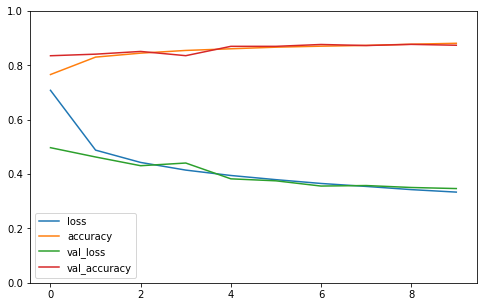

In [80]:

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()


In [81]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 60.5066 - accuracy: 0.8352


[60.506587982177734, 0.8352000117301941]

## Using model to make predictions

In [82]:
X_new = X_test[:3]

In [83]:
y_probablities = model.predict(X_new)

In [84]:
y_probablities

array([[3.9527379e-08, 8.3542354e-22, 0.0000000e+00, 2.5633831e-19,
        1.0000000e+00, 2.8606927e-37, 0.0000000e+00, 2.1262550e-26,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0239779e-11, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.2832547e-19, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.8542397e-31,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [85]:
y_probablities.round(4)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
y_pred = np.argmax(y_probablities, axis=-1)

In [33]:
y_pred

array([6, 5, 5], dtype=int64)

In [34]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [35]:
 np.array(class_names)[y_pred]

array(['Shirt', 'Sandal', 'Sandal'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API 

In [37]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [38]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test =scaler.transform(X_test)

In [39]:
type(X_train.shape[1])

int

In [40]:
type(X_train.shape[1:])

tuple

In [41]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(1))          

In [42]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu",
input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [43]:
model.compile(loss = "mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

In [44]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.5181 - accuracy: 0.0022 - val_loss: 0.9514 - val_accuracy: 0.0026
Epoch 2/10
363/363 [==============================] - 0s 839us/step - loss: 0.8786 - accuracy: 0.0028 - val_loss: 0.7321 - val_accuracy: 0.0026
Epoch 3/10
363/363 [==============================] - 0s 896us/step - loss: 0.7049 - accuracy: 0.0028 - val_loss: 0.6974 - val_accuracy: 0.0026
Epoch 4/10
363/363 [==============================] - 0s 828us/step - loss: 0.6668 - accuracy: 0.0028 - val_loss: 0.6780 - val_accuracy: 0.0026
Epoch 5/10
363/363 [==============================] - 0s 845us/step - loss: 0.6453 - accuracy: 0.0028 - val_loss: 0.6596 - val_accuracy: 0.0026
Epoch 6/10
363/363 [==============================] - 0s 819us/step - loss: 0.6278 - accuracy: 0.0028 - val_loss: 0.6430 - val_accuracy: 0.0026
Epoch 7/10
363/363 [==============================] - 0s 942us/step - loss: 0.6123 - accuracy: 0.0028 - val_loss: 0.6277 - val_accuracy: 0

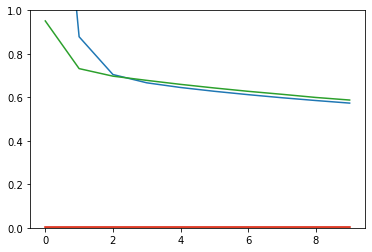

In [46]:
plt.plot(pd.DataFrame(history.history))
#plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 636us/step - loss: 0.5969 - accuracy: 0.0037


[0.5969493985176086, 0.0036821705289185047]

In [48]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 35ms/step


array([[2.313411 ],
       [2.6926491],
       [0.9148443]], dtype=float32)

In [49]:
y_test[:3]

array([1.787, 1.58 , 0.804])

### Functional API 

In [50]:
input_ = keras.layers.Input(shape =X_train.shape[1:] )
hidden_1 = keras.layers.Dense(3, activation="relu")(input_)
hidden_2 = keras.layers.Dense(3,activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_,hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=input_,outputs=output )

In [51]:
model.compile(loss="mean_squared_error", optimizer = "sgd", metrics=["accuracy"] )

In [52]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
363/363 [==============================] - 0s 704us/step - loss: 0.9536 - accuracy: 0.0028
Epoch 2/10
363/363 [==============================] - 0s 704us/step - loss: 0.5611 - accuracy: 0.0028
Epoch 3/10
363/363 [==============================] - 0s 645us/step - loss: 0.5332 - accuracy: 0.0028
Epoch 4/10
363/363 [==============================] - 0s 744us/step - loss: 0.6650 - accuracy: 0.0028
Epoch 5/10
363/363 [==============================] - 0s 669us/step - loss: 0.5154 - accuracy: 0.0028
Epoch 6/10
363/363 [==============================] - 0s 685us/step - loss: 0.5107 - accuracy: 0.0028
Epoch 7/10
363/363 [==============================] - 0s 650us/step - loss: 0.5283 - accuracy: 0.0028
Epoch 8/10
363/363 [==============================] - 0s 721us/step - loss: 0.5183 - accuracy: 0.0027
Epoch 9/10
363/363 [==============================] - 0s 659us/step - loss: 0.5185 - accuracy: 0.0028
Epoch 10/10
363/363 [==============================] - 0s 684us/step - loss: 0.509

### If you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path

In [53]:
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden_1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden_2= keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.Concatenate()([input_A,hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs =[input_A,input_B], outputs=output )

In [54]:
model.compile(loss="mse", optimizer = keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"] )

In [55]:
X_train_A = X_train[:,:5]
X_train_B = X_train[:,2:]
X_valid_A =  X_valid[:,:5]
X_valid_B = X_valid[:,2:]
X_test_A =  X_test[:,:5]
X_test_B = X_test[:,2:]

In [56]:
model.fit([X_train_A,X_train_B], y_train, epochs=20, validation_data = ([X_valid_A,X_valid_B], y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4084 - accuracy: 0.0021 - val_loss: 0.9062 - val_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 0s 893us/step - loss: 0.7900 - accuracy: 0.0028 - val_loss: 0.7339 - val_accuracy: 0.0026
Epoch 3/20
363/363 [==============================] - 0s 933us/step - loss: 0.6812 - accuracy: 0.0028 - val_loss: 0.6514 - val_accuracy: 0.0026
Epoch 4/20
363/363 [==============================] - 0s 951us/step - loss: 0.6199 - accuracy: 0.0028 - val_loss: 0.6074 - val_accuracy: 0.0026
Epoch 5/20
363/363 [==============================] - 0s 921us/step - loss: 0.5852 - accuracy: 0.0028 - val_loss: 0.5811 - val_accuracy: 0.0026
Epoch 6/20
363/363 [==============================] - 0s 961us/step - loss: 0.5620 - accuracy: 0.0028 - val_loss: 0.5654 - val_accuracy: 0.0026
Epoch 7/20
363/363 [==============================] - 0s 976us/step - loss: 0.5453 - accuracy: 0.0028 - val_loss: 0.5500 - val_accuracy: 0

In [57]:
model.evaluate((X_test_A,X_test_B), y_test)

162/162 [==============================] - 0s 642us/step - loss: 0.5029 - accuracy: 0.0037


[0.502906322479248, 0.0036821705289185047]

In [58]:
model.predict((X_test_A[:3],X_test_B[:3]))

1/1 [==============================] - 0s 32ms/step


array([[2.3801677 ],
       [3.1932583 ],
       [0.76266915]], dtype=float32)

### Adding extra outputs

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [60]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.9301 - main_output_loss: 2.7772 - aux_output_loss: 4.3061 - val_loss: 1.4990 - val_main_output_loss: 1.2659 - val_aux_output_loss: 3.5970
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2351 - main_output_loss: 1.0428 - aux_output_loss: 2.9658 - val_loss: 1.0185 - val_main_output_loss: 0.8541 - val_aux_output_loss: 2.4981
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9275 - main_output_loss: 0.7878 - aux_output_loss: 2.1847 - val_loss: 0.8589 - val_main_output_loss: 0.7360 - val_aux_output_loss: 1.9649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8087 - main_output_loss: 0.6993 - aux_output_loss: 1.7939 - val_loss: 0.7750 - val_main_output_loss: 0.6751 - val_aux_output_loss: 1.6746
Epoch 5/20
363/363 [==============================] - 0s 946us/step - loss: 0.7437 - main_output_loss: 0.6505 - aux_output_loss: 1.5824 - val_lo

In [62]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 770us/step - loss: 0.5590 - main_output_loss: 0.4985 - aux_output_loss: 1.1039


[0.5590282082557678, 0.49848589301109314, 1.103907823562622]

In [63]:
model.predict([X_test_A[:3], X_test_B[:3]])


1/1 [==============================] - 0s 37ms/step


[array([[2.298667],
        [3.202664],
        [0.659891]], dtype=float32),
 array([[2.5179083],
        [2.3659084],
        [1.6994157]], dtype=float32)]

## Saving the model 

In [64]:
model.save("my_keras_model.h5")


## Loading the model

In [65]:
model = keras.models.load_model("my_keras_model.h5")


### Callbacks 

In [67]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "model_2" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 8) dtype=float32>]


## Hyperparameters 

In [68]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [69]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test =scaler.transform(X_test)

In [70]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.SGD(lr=learning_rate)
        model.compile(loss="mse", optimizer=optimizer)
    return model


In [71]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1116\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [72]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test[:3])


Epoch 1/100
  1/363 [..............................] - ETA: 49s - loss: 6.7856

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 0s 948us/step - loss: 1.2397 - val_loss: 0.6986
Epoch 2/100
363/363 [==============================] - 0s 804us/step - loss: 0.6286 - val_loss: 0.5900
Epoch 3/100
363/363 [==============================] - 0s 790us/step - loss: 0.5651 - val_loss: 0.5444
Epoch 4/100
363/363 [==============================] - 0s 839us/step - loss: 0.5274 - val_loss: 0.5158
Epoch 5/100
363/363 [==============================] - 0s 860us/step - loss: 0.5029 - val_loss: 0.4984
Epoch 6/100
363/363 [==============================] - 0s 842us/step - loss: 0.4849 - val_loss: 0.4802
Epoch 7/100
363/363 [==============================] - 0s 815us/step - loss: 0.4701 - val_loss: 0.4664
Epoch 8/100
363/363 [==============================] - 0s 849us/step - loss: 0.4619 - val_loss: 0.4582
Epoch 9/100
363/363 [==============================] - 0s 831us/step - loss: 0.4526 - val_loss: 0.4500
Epoch 10/100
363/363 [==============================] - 0s 817us/step - loss: 0.4464 

Epoch 80/100
363/363 [==============================] - 0s 844us/step - loss: 0.3457 - val_loss: 0.3562
Epoch 81/100
363/363 [==============================] - 0s 779us/step - loss: 0.3500 - val_loss: 0.3560
Epoch 82/100
363/363 [==============================] - 0s 944us/step - loss: 0.3569 - val_loss: 0.3550
Epoch 83/100
363/363 [==============================] - 0s 846us/step - loss: 0.3517 - val_loss: 0.3566
Epoch 84/100
363/363 [==============================] - 0s 794us/step - loss: 0.3438 - val_loss: 0.3537
Epoch 85/100
363/363 [==============================] - 0s 899us/step - loss: 0.3417 - val_loss: 0.3520
Epoch 86/100
363/363 [==============================] - 0s 854us/step - loss: 0.3417 - val_loss: 0.3538
Epoch 87/100
363/363 [==============================] - 0s 814us/step - loss: 0.3432 - val_loss: 0.3525
Epoch 88/100
363/363 [==============================] - 0s 899us/step - loss: 0.3412 - val_loss: 0.3515
Epoch 89/100
363/363 [==============================] - 0s 857us

In [73]:
param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100


C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 1.8301 - val_loss: 0.8513
Epoch 2/100
242/242 [==============================] - 0s 909us/step - loss: 0.6770 - val_loss: 0.6174
Epoch 3/100
242/242 [==============================] - 0s 952us/step - loss: 0.5923 - val_loss: 0.5790
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5597 - val_loss: 0.5486
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5319 - val_loss: 0.5241
Epoch 6/100
242/242 [==============================] - 0s 965us/step - loss: 0.5080 - val_loss: 0.5050
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4890 - val_loss: 0.4872
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4725 - val_loss: 0.4716
Epoch 9/100
242/242 [==============================] - 0s 967us/step - loss: 0.4580 - val_loss: 0.4577
Epoch 10/100
242/242 [==============================] - 0s 966us/step - loss: 0.4453 - val_loss

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.6982 - val_loss: 0.8500
Epoch 2/100
242/242 [==============================] - 0s 948us/step - loss: 0.7314 - val_loss: 0.6471
Epoch 3/100
242/242 [==============================] - 0s 940us/step - loss: 0.6160 - val_loss: 0.5875
Epoch 4/100
242/242 [==============================] - 0s 937us/step - loss: 0.5616 - val_loss: 0.5441
Epoch 5/100
242/242 [==============================] - 0s 956us/step - loss: 0.5234 - val_loss: 0.5126
Epoch 6/100
242/242 [==============================] - 0s 955us/step - loss: 0.4955 - val_loss: 0.4920
Epoch 7/100
242/242 [==============================] - 0s 887us/step - loss: 0.4759 - val_loss: 0.4688
Epoch 8/100
242/242 [==============================] - 0s 891us/step - loss: 0.4583 - val_loss: 0.4549
Epoch 9/100
242/242 [==============================] - 0s 951us/step - loss: 0.4459 - val_loss: 0.4425
Epoch 10/100
242/242 [==============================] - 0s 936us/step - loss: 0.4347 - 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.0527 - val_loss: 1.2943
Epoch 2/100
242/242 [==============================] - 0s 972us/step - loss: 1.1372 - val_loss: 0.8810
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7164 - val_loss: 0.6264
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6214 - val_loss: 0.5866
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5856 - val_loss: 0.5570
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5565 - val_loss: 0.5321
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5326 - val_loss: 0.5111
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5113 - val_loss: 0.4959
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4933 - val_loss: 0.4791
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4786 - val_loss: 0.4666

Epoch 81/100
242/242 [==============================] - 0s 991us/step - loss: 0.3170 - val_loss: 0.3420
Epoch 82/100
242/242 [==============================] - 0s 991us/step - loss: 0.3131 - val_loss: 0.3332
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3126 - val_loss: 0.3351
Epoch 84/100
242/242 [==============================] - 0s 979us/step - loss: 0.3181 - val_loss: 0.3346
Epoch 85/100
242/242 [==============================] - 0s 951us/step - loss: 0.3138 - val_loss: 0.3398
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3130 - val_loss: 0.3359
Epoch 87/100
242/242 [==============================] - 0s 989us/step - loss: 0.3103 - val_loss: 0.3290
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3096 - val_loss: 0.3308
Epoch 89/100
242/242 [==============================] - 0s 984us/step - loss: 0.3148 - val_loss: 0.3367
Epoch 90/100
242/242 [==============================] - 0s 999us/step 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.4378 - val_loss: 0.6833
Epoch 2/100
242/242 [==============================] - 0s 882us/step - loss: 0.6487 - val_loss: 0.6147
Epoch 3/100
242/242 [==============================] - 0s 909us/step - loss: 0.5871 - val_loss: 0.5750
Epoch 4/100
242/242 [==============================] - 0s 982us/step - loss: 0.5569 - val_loss: 0.5545
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5322 - val_loss: 0.5314
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5138 - val_loss: 0.5107
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5059 - val_loss: 0.5058
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4891 - val_loss: 0.4889
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4819 - val_loss: 0.4823
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4755 - val_loss: 0.

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.6089 - val_loss: 0.6382
Epoch 2/100
242/242 [==============================] - 0s 887us/step - loss: 0.6174 - val_loss: 0.5801
Epoch 3/100
242/242 [==============================] - 0s 907us/step - loss: 0.5747 - val_loss: 0.5552
Epoch 4/100
242/242 [==============================] - 0s 877us/step - loss: 0.5460 - val_loss: 0.5275
Epoch 5/100
242/242 [==============================] - 0s 900us/step - loss: 0.5253 - val_loss: 0.5305
Epoch 6/100
242/242 [==============================] - 0s 899us/step - loss: 0.5111 - val_loss: 0.4976
Epoch 7/100
242/242 [==============================] - 0s 872us/step - loss: 0.4971 - val_loss: 0.4900
Epoch 8/100
242/242 [==============================] - 0s 866us/step - loss: 0.4839 - val_loss: 0.4755
Epoch 9/100
242/242 [==============================] - 0s 895us/step - loss: 0.4785 - val_loss: 0.4735
Epoch 10/100
242/242 [==============================] - 0s 891us/step - loss: 0.4688 - 

242/242 [==============================] - 0s 884us/step - loss: 0.3779 - val_loss: 0.3887
Epoch 81/100
242/242 [==============================] - 0s 946us/step - loss: 0.3771 - val_loss: 0.3958
Epoch 82/100
242/242 [==============================] - 0s 952us/step - loss: 0.3777 - val_loss: 0.3872
Epoch 83/100
242/242 [==============================] - 0s 920us/step - loss: 0.3969 - val_loss: 0.3983
Epoch 84/100
242/242 [==============================] - 0s 868us/step - loss: 0.3823 - val_loss: 0.4560
Epoch 85/100
242/242 [==============================] - 0s 900us/step - loss: 0.3911 - val_loss: 0.4207
Epoch 86/100
242/242 [==============================] - 0s 902us/step - loss: 0.3828 - val_loss: 0.3920
Epoch 87/100
242/242 [==============================] - 0s 915us/step - loss: 0.3849 - val_loss: 0.4004
Epoch 88/100
242/242 [==============================] - 0s 890us/step - loss: 0.3787 - val_loss: 0.3894
Epoch 89/100
242/242 [==============================] - 0s 959us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.4856 - val_loss: 0.7529
Epoch 2/100
242/242 [==============================] - 0s 948us/step - loss: 0.6996 - val_loss: 0.6575
Epoch 3/100
242/242 [==============================] - 0s 892us/step - loss: 0.6329 - val_loss: 0.6087
Epoch 4/100
242/242 [==============================] - 0s 902us/step - loss: 0.5889 - val_loss: 0.5746
Epoch 5/100
242/242 [==============================] - 0s 896us/step - loss: 0.5590 - val_loss: 0.5472
Epoch 6/100
242/242 [==============================] - 0s 934us/step - loss: 0.5339 - val_loss: 0.5255
Epoch 7/100
242/242 [==============================] - 0s 902us/step - loss: 0.5170 - val_loss: 0.5138
Epoch 8/100
242/242 [==============================] - 0s 878us/step - loss: 0.5032 - val_loss: 0.5068
Epoch 9/100
242/242 [==============================] - 0s 976us/step - loss: 0.4926 - val_loss: 0.4975
Epoch 10/100
242/242 [==============================] - 0s 899us/step - loss: 0.4873 - 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.4583 - val_loss: 1.8692
Epoch 2/100
242/242 [==============================] - 0s 896us/step - loss: 1.3292 - val_loss: 0.9841
Epoch 3/100
242/242 [==============================] - 0s 950us/step - loss: 0.8681 - val_loss: 0.7638
Epoch 4/100
242/242 [==============================] - 0s 905us/step - loss: 0.7158 - val_loss: 0.6710
Epoch 5/100
242/242 [==============================] - 0s 965us/step - loss: 0.6551 - val_loss: 0.6378
Epoch 6/100
242/242 [==============================] - 0s 933us/step - loss: 0.6281 - val_loss: 0.6168
Epoch 7/100
242/242 [==============================] - 0s 941us/step - loss: 0.6096 - val_loss: 0.6013
Epoch 8/100
242/242 [==============================] - 0s 896us/step - loss: 0.5943 - val_loss: 0.5877
Epoch 9/100
242/242 [==============================] - 0s 903us/step - loss: 0.5807 - val_loss: 0.5753
Epoch 10/100
242/242 [==============================] - 0s 963us/step - loss: 0.5678 - 

242/242 [==============================] - 0s 895us/step - loss: 0.3650 - val_loss: 0.3757
Epoch 81/100
242/242 [==============================] - 0s 873us/step - loss: 0.3641 - val_loss: 0.3747
Epoch 82/100
242/242 [==============================] - 0s 946us/step - loss: 0.3634 - val_loss: 0.3745
Epoch 83/100
242/242 [==============================] - 0s 902us/step - loss: 0.3623 - val_loss: 0.3735
Epoch 84/100
242/242 [==============================] - 0s 963us/step - loss: 0.3615 - val_loss: 0.3737
Epoch 85/100
242/242 [==============================] - 0s 903us/step - loss: 0.3606 - val_loss: 0.3720
Epoch 86/100
242/242 [==============================] - 0s 895us/step - loss: 0.3598 - val_loss: 0.3719
Epoch 87/100
242/242 [==============================] - 0s 928us/step - loss: 0.3592 - val_loss: 0.3710
Epoch 88/100
242/242 [==============================] - 0s 924us/step - loss: 0.3582 - val_loss: 0.3705
Epoch 89/100
242/242 [==============================] - 0s 963us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.1709 - val_loss: 1.7390
Epoch 2/100
242/242 [==============================] - 0s 887us/step - loss: 1.4341 - val_loss: 1.2225
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1205 - val_loss: 0.9981
Epoch 4/100
242/242 [==============================] - 0s 917us/step - loss: 0.9037 - val_loss: 0.8180
Epoch 5/100
242/242 [==============================] - 0s 970us/step - loss: 0.7714 - val_loss: 0.7338
Epoch 6/100
242/242 [==============================] - 0s 954us/step - loss: 0.7158 - val_loss: 0.6975
Epoch 7/100
242/242 [==============================] - 0s 973us/step - loss: 0.6863 - val_loss: 0.6730
Epoch 8/100
242/242 [==============================] - 0s 952us/step - loss: 0.6613 - val_loss: 0.6501
Epoch 9/100
242/242 [==============================] - 0s 936us/step - loss: 0.6382 - val_loss: 0.6293
Epoch 10/100
242/242 [==============================] - 0s 935us/step - loss: 0.6178 - va

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.0412 - val_loss: 1.4952
Epoch 2/100
242/242 [==============================] - 0s 924us/step - loss: 1.2845 - val_loss: 1.0214
Epoch 3/100
242/242 [==============================] - 0s 951us/step - loss: 0.9067 - val_loss: 0.8187
Epoch 4/100
242/242 [==============================] - 0s 943us/step - loss: 0.7612 - val_loss: 0.7226
Epoch 5/100
242/242 [==============================] - 0s 948us/step - loss: 0.6977 - val_loss: 0.6793
Epoch 6/100
242/242 [==============================] - 0s 933us/step - loss: 0.6644 - val_loss: 0.6532
Epoch 7/100
242/242 [==============================] - 0s 953us/step - loss: 0.6410 - val_loss: 0.6329
Epoch 8/100
242/242 [==============================] - 0s 960us/step - loss: 0.6217 - val_loss: 0.6155
Epoch 9/100
242/242 [==============================] - 0s 961us/step - loss: 0.6049 - val_loss: 0.5997
Epoch 10/100
242/242 [==============================] - 0s 956us/step - loss: 0.5898 - 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 1.4527 - val_loss: 0.9245
Epoch 2/100
242/242 [==============================] - 0s 999us/step - loss: 0.5667 - val_loss: 0.5548
Epoch 3/100
242/242 [==============================] - 0s 946us/step - loss: 0.4434 - val_loss: 0.4051
Epoch 4/100
242/242 [==============================] - 0s 876us/step - loss: 0.4053 - val_loss: 0.4327
Epoch 5/100
242/242 [==============================] - 0s 884us/step - loss: 0.3870 - val_loss: 0.3887
Epoch 6/100
242/242 [==============================] - 0s 949us/step - loss: 0.3722 - val_loss: 0.3691
Epoch 7/100
242/242 [==============================] - 0s 948us/step - loss: 0.3715 - val_loss: 0.4241
Epoch 8/100
242/242 [==============================] - 0s 932us/step - loss: 0.4070 - val_loss: 0.4573
Epoch 9/100
242/242 [==============================] - 0s 949us/step - loss: 0.5783 - val_loss: 0.4072
Epoch 10/100
242/242 [==============================] - 0s 928us/step - loss: 0.4093 - 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 1.1960 - val_loss: 0.6064
Epoch 2/100
242/242 [==============================] - 0s 913us/step - loss: 0.5181 - val_loss: 0.4865
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4395 - val_loss: 0.4112
Epoch 4/100
242/242 [==============================] - 0s 939us/step - loss: 0.4094 - val_loss: 0.4024
Epoch 5/100
242/242 [==============================] - 0s 946us/step - loss: 0.4038 - val_loss: 0.4077
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3878 - val_loss: 0.3699
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.3723
Epoch 8/100
242/242 [==============================] - 0s 953us/step - loss: 0.3613 - val_loss: 0.3802
Epoch 9/100
242/242 [==============================] - 0s 971us/step - loss: 0.3676 - val_loss: 0.3854
Epoch 10/100
242/242 [==============================] - 0s 969us/step - loss: 0.3636 - val_lo

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 0.8256 - val_loss: 0.4854
Epoch 2/100
242/242 [==============================] - 0s 937us/step - loss: 0.4477 - val_loss: 0.4342
Epoch 3/100
242/242 [==============================] - 0s 953us/step - loss: 0.4141 - val_loss: 0.3916
Epoch 4/100
242/242 [==============================] - 0s 952us/step - loss: 0.3947 - val_loss: 0.3853
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3835 - val_loss: 0.3803
Epoch 6/100
242/242 [==============================] - 0s 960us/step - loss: 0.3762 - val_loss: 0.3763
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3693 - val_loss: 0.3716
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3687 - val_loss: 0.4136
Epoch 9/100
242/242 [==============================] - 0s 973us/step - loss: 0.3634 - val_loss: 0.3711
Epoch 10/100
242/242 [==============================] - 0s 940us/step - loss: 0.3551 - val_lo

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 875us/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 883us/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 830us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 832us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 823us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 961us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 874us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 887us/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 608us/step - loss: nan
Epoch 1/100
  1/242 [..............................] - ETA:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 0.7740 - val_loss: 0.6565
Epoch 2/100
242/242 [==============================] - 0s 842us/step - loss: 1.5200 - val_loss: 0.4521
Epoch 3/100
242/242 [==============================] - 0s 896us/step - loss: 0.4494 - val_loss: 0.4335
Epoch 4/100
242/242 [==============================] - 0s 901us/step - loss: 0.4228 - val_loss: 0.4014
Epoch 5/100
242/242 [==============================] - 0s 844us/step - loss: 0.4080 - val_loss: 0.3978
Epoch 6/100
242/242 [==============================] - 0s 940us/step - loss: 0.3923 - val_loss: 0.4294
Epoch 7/100
242/242 [==============================] - 0s 862us/step - loss: 0.4964 - val_loss: 0.4146
Epoch 8/100
242/242 [==============================] - 0s 953us/step - loss: 0.6006 - val_loss: 0.4607
Epoch 9/100
242/242 [==============================] - 0s 901us/step - loss: 0.4100 - val_loss: 0.4031
Epoch 10/100
242/242 [==============================] - 0s 884us/step - loss: 0.4095 - 

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 0.9090 - val_loss: 1.1302
Epoch 2/100
242/242 [==============================] - 0s 938us/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 897us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 855us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 935us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 925us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 865us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 951us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 875us/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [=================

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.5138 - val_loss: 0.9518
Epoch 2/100
242/242 [==============================] - 0s 908us/step - loss: 0.8288 - val_loss: 0.7025
Epoch 3/100
242/242 [==============================] - 0s 902us/step - loss: 0.6635 - val_loss: 0.6397
Epoch 4/100
242/242 [==============================] - 0s 915us/step - loss: 0.6192 - val_loss: 0.6060
Epoch 5/100
242/242 [==============================] - 0s 951us/step - loss: 0.5895 - val_loss: 0.5816
Epoch 6/100
242/242 [==============================] - 0s 902us/step - loss: 0.5641 - val_loss: 0.5589
Epoch 7/100
242/242 [==============================] - 0s 986us/step - loss: 0.5433 - val_loss: 0.5379
Epoch 8/100
242/242 [==============================] - 0s 890us/step - loss: 0.5238 - val_loss: 0.5205
Epoch 9/100
242/242 [==============================] - 0s 940us/step - loss: 0.5071 - val_loss: 0.5057
Epoch 10/100
242/242 [==============================] - 0s 923us/step - loss: 0.4919 - 

242/242 [==============================] - 0s 877us/step - loss: 0.3296 - val_loss: 0.3546
Epoch 81/100
242/242 [==============================] - 0s 872us/step - loss: 0.3281 - val_loss: 0.3531
Epoch 82/100
242/242 [==============================] - 0s 940us/step - loss: 0.3277 - val_loss: 0.3538
Epoch 83/100
242/242 [==============================] - 0s 957us/step - loss: 0.3274 - val_loss: 0.3580
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3274 - val_loss: 0.3530
Epoch 85/100
242/242 [==============================] - 0s 935us/step - loss: 0.3266 - val_loss: 0.3548
Epoch 86/100
242/242 [==============================] - 0s 999us/step - loss: 0.3257 - val_loss: 0.3510
Epoch 87/100
242/242 [==============================] - 0s 904us/step - loss: 0.3248 - val_loss: 0.3598
Epoch 88/100
242/242 [==============================] - 0s 903us/step - loss: 0.3248 - val_loss: 0.3531
Epoch 89/100
242/242 [==============================] - 0s 946us/step - loss: 0

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 2.2068 - val_loss: 0.9451
Epoch 2/100
242/242 [==============================] - 0s 903us/step - loss: 0.8029 - val_loss: 0.7067
Epoch 3/100
242/242 [==============================] - 0s 962us/step - loss: 0.6721 - val_loss: 0.6589
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 0.6341 - val_loss: 0.6263
Epoch 5/100
242/242 [==============================] - 0s 958us/step - loss: 0.6050 - val_loss: 0.6003
Epoch 6/100
242/242 [==============================] - 0s 956us/step - loss: 0.5809 - val_loss: 0.5765
Epoch 7/100
242/242 [==============================] - 0s 970us/step - loss: 0.5590 - val_loss: 0.5565
Epoch 8/100
242/242 [==============================] - 0s 908us/step - loss: 0.5402 - val_loss: 0.5387
Epoch 9/100
242/242 [==============================] - 0s 944us/step - loss: 0.5238 - val_loss: 0.5234
Epoch 10/100
242/242 [==============================] - 0s 903us/step - loss: 0.5093 - 

242/242 [==============================] - 0s 902us/step - loss: 0.3387 - val_loss: 0.3567
Epoch 81/100
242/242 [==============================] - 0s 898us/step - loss: 0.3383 - val_loss: 0.3588
Epoch 82/100
242/242 [==============================] - 0s 833us/step - loss: 0.3381 - val_loss: 0.3555
Epoch 83/100
242/242 [==============================] - 0s 937us/step - loss: 0.3371 - val_loss: 0.3557
Epoch 84/100
242/242 [==============================] - 0s 896us/step - loss: 0.3373 - val_loss: 0.3577
Epoch 85/100
242/242 [==============================] - 0s 953us/step - loss: 0.3370 - val_loss: 0.3550
Epoch 86/100
242/242 [==============================] - 0s 889us/step - loss: 0.3363 - val_loss: 0.3543
Epoch 87/100
242/242 [==============================] - 0s 897us/step - loss: 0.3360 - val_loss: 0.3545
Epoch 88/100
242/242 [==============================] - 0s 916us/step - loss: 0.3353 - val_loss: 0.3565
Epoch 89/100
242/242 [==============================] - 0s 962us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 3.0675 - val_loss: 1.6564
Epoch 2/100
242/242 [==============================] - 0s 924us/step - loss: 1.3837 - val_loss: 1.3138
Epoch 3/100
242/242 [==============================] - 0s 910us/step - loss: 1.2575 - val_loss: 1.2353
Epoch 4/100
242/242 [==============================] - 0s 930us/step - loss: 1.1180 - val_loss: 1.0115
Epoch 5/100
242/242 [==============================] - 0s 988us/step - loss: 0.8594 - val_loss: 0.7502
Epoch 6/100
242/242 [==============================] - 0s 930us/step - loss: 0.6948 - val_loss: 0.6657
Epoch 7/100
242/242 [==============================] - 0s 983us/step - loss: 0.6438 - val_loss: 0.6313
Epoch 8/100
242/242 [==============================] - 0s 911us/step - loss: 0.6136 - val_loss: 0.6055
Epoch 9/100
242/242 [==============================] - 0s 930us/step - loss: 0.5879 - val_loss: 0.5809
Epoch 10/100
242/242 [==============================] - 0s 985us/step - loss: 0.5647 - 

121/121 [==============================] - 0s 611us/step - loss: 0.3449
Epoch 1/100


C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 4.2034 - val_loss: 3.0188
Epoch 2/100
242/242 [==============================] - 0s 987us/step - loss: 2.3446 - val_loss: 1.7541
Epoch 3/100
242/242 [==============================] - 0s 950us/step - loss: 1.5433 - val_loss: 1.3712
Epoch 4/100
242/242 [==============================] - 0s 963us/step - loss: 1.3567 - val_loss: 1.3150
Epoch 5/100
242/242 [==============================] - 0s 941us/step - loss: 1.3289 - val_loss: 1.3049
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3202 - val_loss: 1.2977
Epoch 7/100
242/242 [==============================] - 0s 953us/step - loss: 1.3120 - val_loss: 1.2885
Epoch 8/100
242/242 [==============================] - 0s 905us/step - loss: 1.3011 - val_loss: 1.2759
Epoch 9/100
242/242 [==============================] - 0s 911us/step - loss: 1.2861 - val_loss: 1.2581
Epoch 10/100
242/242 [==============================] - 0s 946us/step - loss: 1.2650 - va

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 1ms/step - loss: 4.2792 - val_loss: 3.1091
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.4585 - val_loss: 1.8605
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6115 - val_loss: 1.3939
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3395 - val_loss: 1.2758
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2684 - val_loss: 1.2368
Epoch 6/100
242/242 [==============================] - 0s 939us/step - loss: 1.2308 - val_loss: 1.1986
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1867 - val_loss: 1.1471
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1279 - val_loss: 1.0802
Epoch 9/100
242/242 [==============================] - 0s 997us/step - loss: 1.0547 - val_loss: 0.9994
Epoch 10/100
242/242 [==============================] - 0s 942us/step - loss: 0.9696 - val_loss: 0.

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 4.1670 - val_loss: 3.1081
Epoch 2/100
242/242 [==============================] - 0s 880us/step - loss: 2.4284 - val_loss: 1.9424
Epoch 3/100
242/242 [==============================] - 0s 925us/step - loss: 1.6528 - val_loss: 1.4884
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3822 - val_loss: 1.3521
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3056 - val_loss: 1.3145
Epoch 6/100
242/242 [==============================] - 0s 949us/step - loss: 1.2818 - val_loss: 1.2991
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2696 - val_loss: 1.2880
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2585 - val_loss: 1.2759
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2459 - val_loss: 1.2616
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2305 - val_loss: 1.

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 5.4342 - val_loss: 4.0316
Epoch 2/100
242/242 [==============================] - 0s 819us/step - loss: 3.3588 - val_loss: 2.7248
Epoch 3/100
242/242 [==============================] - 0s 824us/step - loss: 2.3798 - val_loss: 2.0075
Epoch 4/100
242/242 [==============================] - 0s 841us/step - loss: 1.8082 - val_loss: 1.5767
Epoch 5/100
242/242 [==============================] - 0s 806us/step - loss: 1.4534 - val_loss: 1.3017
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2148 - val_loss: 1.1107
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0422 - val_loss: 0.9696
Epoch 8/100
242/242 [==============================] - 0s 743us/step - loss: 0.9114 - val_loss: 0.8622
Epoch 9/100
242/242 [==============================] - 0s 811us/step - loss: 0.8146 - val_loss: 0.7828
Epoch 10/100
242/242 [==============================] - 0s 892us/step - loss: 0.7451 - val_

242/242 [==============================] - 0s 868us/step - loss: 0.4621 - val_loss: 0.4649
Epoch 81/100
242/242 [==============================] - 0s 837us/step - loss: 0.4617 - val_loss: 0.4650
Epoch 82/100
242/242 [==============================] - 0s 849us/step - loss: 0.4604 - val_loss: 0.4635
Epoch 83/100
242/242 [==============================] - 0s 802us/step - loss: 0.4602 - val_loss: 0.4628
Epoch 84/100
242/242 [==============================] - 0s 817us/step - loss: 0.4596 - val_loss: 0.4627
Epoch 85/100
242/242 [==============================] - 0s 858us/step - loss: 0.4587 - val_loss: 0.4617
Epoch 86/100
242/242 [==============================] - 0s 808us/step - loss: 0.4579 - val_loss: 0.4607
Epoch 87/100
242/242 [==============================] - 0s 849us/step - loss: 0.4576 - val_loss: 0.4600
Epoch 88/100
242/242 [==============================] - 0s 816us/step - loss: 0.4571 - val_loss: 0.4598
Epoch 89/100
242/242 [==============================] - 0s 813us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 5.5742 - val_loss: 4.2330
Epoch 2/100
242/242 [==============================] - 0s 838us/step - loss: 3.6061 - val_loss: 3.0010
Epoch 3/100
242/242 [==============================] - 0s 824us/step - loss: 2.7156 - val_loss: 2.3951
Epoch 4/100
242/242 [==============================] - 0s 913us/step - loss: 2.2530 - val_loss: 2.0582
Epoch 5/100
242/242 [==============================] - 0s 771us/step - loss: 1.9782 - val_loss: 1.8414
Epoch 6/100
242/242 [==============================] - 0s 839us/step - loss: 1.7905 - val_loss: 1.6829
Epoch 7/100
242/242 [==============================] - 0s 868us/step - loss: 1.6448 - val_loss: 1.5521
Epoch 8/100
242/242 [==============================] - 0s 864us/step - loss: 1.5191 - val_loss: 1.4381
Epoch 9/100
242/242 [==============================] - 0s 864us/step - loss: 1.4039 - val_loss: 1.3327
Epoch 10/100
242/242 [==============================] - 0s 884us/step - loss: 1.3011 - 

242/242 [==============================] - 0s 898us/step - loss: 0.5577 - val_loss: 0.5609
Epoch 81/100
242/242 [==============================] - 0s 853us/step - loss: 0.5558 - val_loss: 0.5588
Epoch 82/100
242/242 [==============================] - 0s 809us/step - loss: 0.5539 - val_loss: 0.5568
Epoch 83/100
242/242 [==============================] - 0s 816us/step - loss: 0.5521 - val_loss: 0.5548
Epoch 84/100
242/242 [==============================] - 0s 889us/step - loss: 0.5503 - val_loss: 0.5533
Epoch 85/100
242/242 [==============================] - 0s 857us/step - loss: 0.5485 - val_loss: 0.5513
Epoch 86/100
242/242 [==============================] - 0s 868us/step - loss: 0.5468 - val_loss: 0.5497
Epoch 87/100
242/242 [==============================] - 0s 809us/step - loss: 0.5452 - val_loss: 0.5478
Epoch 88/100
242/242 [==============================] - 0s 771us/step - loss: 0.5436 - val_loss: 0.5463
Epoch 89/100
242/242 [==============================] - 0s 819us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 0s 1ms/step - loss: 6.9551 - val_loss: 4.8369
Epoch 2/100
242/242 [==============================] - 0s 782us/step - loss: 3.8740 - val_loss: 3.0694
Epoch 3/100
242/242 [==============================] - 0s 851us/step - loss: 2.6126 - val_loss: 2.2246
Epoch 4/100
242/242 [==============================] - 0s 856us/step - loss: 1.9767 - val_loss: 1.7730
Epoch 5/100
242/242 [==============================] - 0s 879us/step - loss: 1.6281 - val_loss: 1.5178
Epoch 6/100
242/242 [==============================] - 0s 905us/step - loss: 1.4254 - val_loss: 1.3629
Epoch 7/100
242/242 [==============================] - 0s 831us/step - loss: 1.2991 - val_loss: 1.2622
Epoch 8/100
242/242 [==============================] - 0s 838us/step - loss: 1.2143 - val_loss: 1.1909
Epoch 9/100
242/242 [==============================] - 0s 838us/step - loss: 1.1525 - val_loss: 1.1367
Epoch 10/100
242/242 [==============================] - 0s 859us/step - loss: 1.1042 - 

242/242 [==============================] - 0s 840us/step - loss: 0.5491 - val_loss: 0.5499
Epoch 81/100
242/242 [==============================] - 0s 931us/step - loss: 0.5479 - val_loss: 0.5488
Epoch 82/100
242/242 [==============================] - 0s 820us/step - loss: 0.5468 - val_loss: 0.5477
Epoch 83/100
242/242 [==============================] - 0s 894us/step - loss: 0.5457 - val_loss: 0.5467
Epoch 84/100
242/242 [==============================] - 0s 798us/step - loss: 0.5447 - val_loss: 0.5458
Epoch 85/100
242/242 [==============================] - 0s 878us/step - loss: 0.5437 - val_loss: 0.5448
Epoch 86/100
242/242 [==============================] - 0s 839us/step - loss: 0.5427 - val_loss: 0.5439
Epoch 87/100
242/242 [==============================] - 0s 876us/step - loss: 0.5418 - val_loss: 0.5430
Epoch 88/100
242/242 [==============================] - 0s 902us/step - loss: 0.5408 - val_loss: 0.5421
Epoch 89/100
242/242 [==============================] - 0s 882us/step - loss:

C:\Users\Admin\ML_PATH\my_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\ML_PATH\my_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 157, in fit
    if (losses.is_categorical_crossentropy(self.model.loss) and
AttributeError: 'Sequential' object has no attribute 'loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Ad

363/363 [==============================] - 0s 925us/step - loss: 1.3116 - val_loss: 0.6537
Epoch 2/100
363/363 [==============================] - 0s 766us/step - loss: 0.5995 - val_loss: 0.5741
Epoch 3/100
363/363 [==============================] - 0s 774us/step - loss: 0.5340 - val_loss: 0.5159
Epoch 4/100
363/363 [==============================] - 0s 759us/step - loss: 0.4822 - val_loss: 0.4707
Epoch 5/100
363/363 [==============================] - 0s 808us/step - loss: 0.4452 - val_loss: 0.4401
Epoch 6/100
363/363 [==============================] - 0s 784us/step - loss: 0.4232 - val_loss: 0.4242
Epoch 7/100
363/363 [==============================] - 0s 741us/step - loss: 0.4100 - val_loss: 0.4138
Epoch 8/100
363/363 [==============================] - 0s 793us/step - loss: 0.3998 - val_loss: 0.4041
Epoch 9/100
363/363 [==============================] - 0s 796us/step - loss: 0.3926 - val_loss: 0.4031
Epoch 10/100
363/363 [==============================] - 0s 737us/step - loss: 0.3864 

Epoch 80/100
363/363 [==============================] - 0s 713us/step - loss: 0.3084 - val_loss: 0.3276
Epoch 81/100
363/363 [==============================] - 0s 731us/step - loss: 0.3083 - val_loss: 0.3312
Epoch 82/100
363/363 [==============================] - 0s 786us/step - loss: 0.3080 - val_loss: 0.3263
Epoch 83/100
363/363 [==============================] - 0s 961us/step - loss: 0.3069 - val_loss: 0.3206
Epoch 84/100
363/363 [==============================] - 0s 962us/step - loss: 0.3072 - val_loss: 0.3220
Epoch 85/100
363/363 [==============================] - 0s 904us/step - loss: 0.3086 - val_loss: 0.3208
Epoch 86/100
363/363 [==============================] - 0s 952us/step - loss: 0.3053 - val_loss: 0.3314
Epoch 87/100
363/363 [==============================] - 0s 816us/step - loss: 0.3061 - val_loss: 0.3243
Epoch 88/100
363/363 [==============================] - 0s 799us/step - loss: 0.3038 - val_loss: 0.3233
Epoch 89/100
363/363 [==============================] - 0s 735us

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000289288D1A30>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002892735DE80>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [74]:
rnd_search_cv.best_params_

{'learning_rate': 0.0032185140603213564, 'n_hidden': 2, 'n_neurons': 43}

In [75]:
rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model